# Data Prep

In [1]:
import pandas as pd 
from sklearn.preprocessing import MultiLabelBinarizer

## Preprocessing

Netflix Customer Satisfaction dataset from a Qualtrics survey. 

The target is "How likely are you to recommend Netflix to someone looking for a streaming service, knowing that they have recently cracked down on password sharing?".

note: It was downloaded as a CSV file with values already.

In [2]:
df = pd.read_csv("stream.csv",skipinitialspace=True)
# Output column headers only
df.head(0)

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Youtube","Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - TikTok","Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Instagram","Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Facebook",How satisfied are you with Netflix's decision to add ad-supported subscription?,"How likely are you to continue subscribing to Netflix, even if some of your favorite shows or movies become unavailable?","How likely are you to recommend Netflix to someone looking for a streaming service, knowing that they have recently cracked down on password sharing?",How satisfied are you with Netflix's original content?,How satisfied are you with Netflix recommender system?,How satisfied are you with the user interface design of Netflix?


Output the initial number of rows and columns in the dataframe.

In [3]:
print(df.shape)
print(df.columns)

(57, 44)
Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language', 'What is your age range?',
       'What is your current employment status or profession?',
       'For how many years have you been a Netflix subscriber?',
       'How often do you watch Netflix in a typical week?',
       'What types of content do you typically watch on Netflix? (Select all that apply)',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Hulu',
  

## Missing Values

Check for any missing values and drop the columns with the most missing values.

In [4]:
# Identify missing values
df.isna().sum().sort_values(ascending=False)

Recipient Email                                                                                                                                                                        57
Recipient Last Name                                                                                                                                                                    57
Recipient First Name                                                                                                                                                                   57
External Data Reference                                                                                                                                                                57
Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - TikTok                                             19
Using the scale below, please rate how likely you are to choose Netfli

Drop features with missing values more than 30 and not useful features.

In [5]:
missing_threshold = 30

# Drop columns with more than 30 missing values
df = df.loc[:, df.isna().sum() <= missing_threshold]

cols = [
    'Recipient Email',
    'Recipient First Name',
    'Recipient Last Name',
    'External Data Reference',
    'IP Address',
    'Response ID',
    'Start Date',
    'End Date',
    'Recorded Date',
    'Location Latitude',
    'Location Longitude',
    'Distribution Channel',
    'Response Type',
    'User Language',
    'Duration (in seconds)',
    'Progress',
    'Finished'
]

# Drop unrelated features
for col in cols:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [6]:
# Identify missing values
df.isna().sum().sort_values(ascending=False)

How satisfied are you with Netflix recommender system?                                                                                                                                 19
Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Instagram    19
Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - TikTok                                             19
Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Hulu                                             18
Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Disney+                                18
Using the scale below, please rate how likely you are to choose Netfli

## Replace missing values

Replace the columns with missing values with the mode. This is to avoid losing more data as those rows may still be useful to predict customer satisfaction.

In [7]:
cols = [
    "How satisfied are you with Netflix recommender system?",
    "Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Instagram",
    "Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - TikTok",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Hulu",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Disney+",
    "Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - Facebook",
    "Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - Instagram",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Disney+",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - HBO Max",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Amazon Prime Video",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Hulu",
    "Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - TikTok",
    "Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Youtube",
    "How satisfied are you with Netflix's decision to add ad-supported subscription?",
    "Using the scale below, please rate how likely you are to choose Netflix over the following social media platforms based on the variety of content available on Netflix. - Facebook",
    "How likely are you to continue subscribing to Netflix, even if some of your favorite shows or movies become unavailable?",
    "How likely are you to recommend Netflix to someone looking for a streaming service, knowing that they have recently cracked down on password sharing?",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - HBO Max",
    "Using the scale below, please rate how likely you are to choose Netflix over free videos on the following social media platforms: - YouTube",
    "How satisfied are you with Netflix's original content?",
    "How satisfied are you with the user interface design of Netflix?",
    "Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video"
]

df.dropna(subset=cols, inplace=True)

In [8]:
# Identify missing values
df.isna().sum().sort_values(ascending=False)

What is your age range?                                                                                                                                                                0
What is your current employment status or profession?                                                                                                                                  0
For how many years have you been a Netflix subscriber?                                                                                                                                 0
How often do you watch Netflix in a typical week?                                                                                                                                      0
What types of content do you typically watch on Netflix? (Select all that apply)                                                                                                       0
Using the scale below, please rate how likely you are to choose Netflix ove

Although the dataset was downloaded as csv file with values already from Qualtrics, still check if each column has numeric data.

In [9]:
print(df.dtypes)

What is your age range?                                                                                                                                                                float64
What is your current employment status or profession?                                                                                                                                  float64
For how many years have you been a Netflix subscriber?                                                                                                                                 float64
How often do you watch Netflix in a typical week?                                                                                                                                      float64
What types of content do you typically watch on Netflix? (Select all that apply)                                                                                                        object
Using the scale below, please rate how likely

The only non-numeric feature is 'What types of content do you typically watch on Netflix? (Select all that apply)'. This can be one hot encoded. 

In [10]:
col = 'What types of content do you typically watch on Netflix? (Select all that apply)'

# Convert the string into lists of genre IDs
df['content_raw'] = df[col].dropna().astype(str).str.split(',')

# One-hot encode using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
content_ohe = pd.DataFrame(
    mlb.fit_transform(df['content_raw'].dropna()),
    columns=[f'genre_{id}' for id in mlb.classes_],
    index=df['content_raw'].dropna().index
)

df = df.join(content_ohe)
df.drop(columns=[col, 'content_raw'], inplace=True)

# Fill the NaNs
df[content_ohe.columns] = df[content_ohe.columns].fillna(0)

In [11]:
df.head(0)

,What is your age range?,What is your current employment status or profession?,For how many years have you been a Netflix subscriber?,How often do you watch Netflix in a typical week?,"Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Hulu","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Disney+","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - HBO Max","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Amazon Prime Video","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Hulu",...,genre_16,genre_17,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9


Rename the 'genre_#' with the actual genre selections from survey by mapping.

In [12]:
genres = {
    '1': "TV_Shows",
    '2': "Movies",
    '3': "Documentaries",
    '4': "Standup_Comedy",
    '5': "Reality_Shows",
    '6': "Animated_Series",
    '7': "Foreign_Language",
    '8': "Original_Content",
    '9': "Children",
    '10': "Drama",
    '11': "Action_Adventure",
    '12': "Romance",
    '13': "Comedy",
    '14': "Horror",
    '15': "SciFi_Fantasy",
    '16': "Thriller_Suspense",
    '17': "Other"
}

rename_map = {f"genre_{k}": genres[k] for k in genres if f"genre_{k}" in df.columns}
df.rename(columns=rename_map, inplace=True)

In [13]:
df.head(0)

,What is your age range?,What is your current employment status or profession?,For how many years have you been a Netflix subscriber?,How often do you watch Netflix in a typical week?,"Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Hulu","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Disney+","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - HBO Max","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Amazon Prime Video","Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its content: - Hulu",...,Thriller_Suspense,Other,Movies,Documentaries,Standup_Comedy,Reality_Shows,Animated_Series,Foreign_Language,Original_Content,Children


In [14]:
print(df.shape)
print(df.columns)

(36, 43)
Index(['What is your age range?',
       'What is your current employment status or profession?',
       'For how many years have you been a Netflix subscriber?',
       'How often do you watch Netflix in a typical week?',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Hulu',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Disney+',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - HBO Max',
       'Using the scale below, please rate how likely you are to choose Netflix over the following streaming ser

Check if all are numeric before downloading new file.

In [15]:
print(df.dtypes)

What is your age range?                                                                                                                                                                float64
What is your current employment status or profession?                                                                                                                                  float64
For how many years have you been a Netflix subscriber?                                                                                                                                 float64
How often do you watch Netflix in a typical week?                                                                                                                                      float64
Using the scale below, please rate how likely you are to choose Netflix over the following streaming services based on its subscription cost: - Amazon Prime Video                     float64
Using the scale below, please rate how likely

In [16]:
df.to_csv("processed_stream.csv", index=False)

In [17]:
## Class Imbalance

<Axes: >

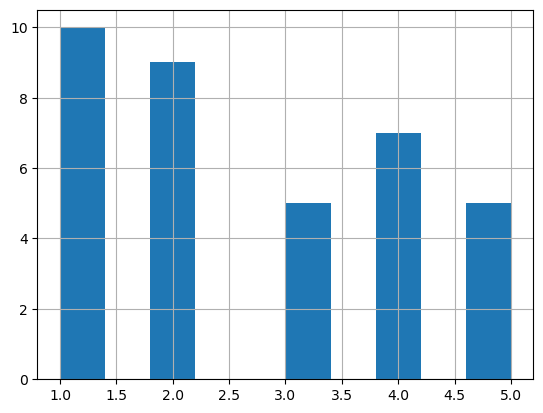

In [18]:
df["How likely are you to recommend Netflix to someone looking for a streaming service, knowing that they have recently cracked down on password sharing?"].hist()

**Analysis:** There are 5 classes (extremely unlikely, ..., extremely likely). There is a class imbalance since class 3 and class 5 have fewer data compared to the other classes. Class 1 and class 2 have the most. To handle class imbalance, oversampling will be used and f1-score instead of accuracy when training/testing the model. 